In [12]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [14]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

#img_path = os.path.join('../data/train/parasitized', 'cell_001.png')
img = load_img('../data/train/parasitized/cell_001.png')

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='cell', save_format='png'):
    i+=1
    if i > 5:
        break

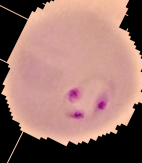

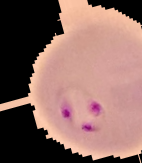

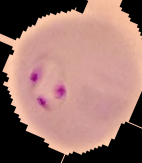

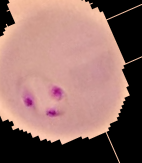

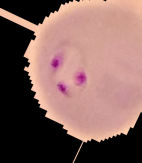

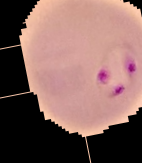

In [24]:
from IPython.display import Image, display

for r, d, f in os.walk('preview'):
    for image in f:
        display(Image(os.path.join(r, image)))

In [40]:
# MODEL

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [41]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '../data/train',
    target_size = (100,100),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '../data/validation',
    target_size = (100, 100),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 3200 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [42]:
model.fit_generator(
    train_generator,
    steps_per_epoch = 2000 // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 800 // batch_size
)

model.save_weights('first_try.h5')

Epoch 1/50
125/125 [==============================] - 4s 35ms/step - loss: 0.7039 - acc: 0.5265 - val_loss: 0.6993 - val_acc: 0.5025
Epoch 2/50
125/125 [==============================] - 2s 18ms/step - loss: 0.6914 - acc: 0.5450 - val_loss: 0.6789 - val_acc: 0.5732
Epoch 3/50
125/125 [==============================] - 2s 18ms/step - loss: 0.6870 - acc: 0.5540 - val_loss: 0.6733 - val_acc: 0.5758
Epoch 4/50
125/125 [==============================] - 2s 18ms/step - loss: 0.6809 - acc: 0.5575 - val_loss: 0.6662 - val_acc: 0.5944
Epoch 5/50
125/125 [==============================] - 2s 18ms/step - loss: 0.6419 - acc: 0.6355 - val_loss: 0.5726 - val_acc: 0.6881
Epoch 6/50
125/125 [==============================] - 2s 18ms/step - loss: 0.4635 - acc: 0.7870 - val_loss: 0.4137 - val_acc: 0.8005
Epoch 7/50
125/125 [==============================] - 2s 18ms/step - loss: 0.3286 - acc: 0.8730 - val_loss: 0.1892 - val_acc: 0.9579
Epoch 8/50
125/125 [==============================] - 2s 18ms/step - 